
Aim: Perform basic image processing using opencv

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to display images 
def show_image(img, title="Image", cmap_type=None):
    plt.figure(figsize=(5,5))
    if cmap_type:
        plt.imshow(img, cmap=cmap_type)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


Original Image Shape: (259, 194, 3)


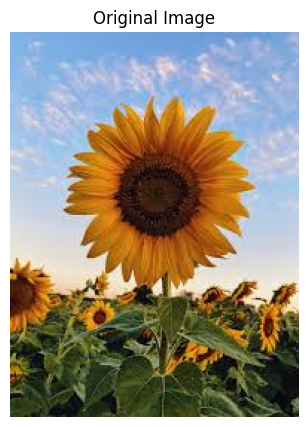

In [ ]:
# 1. Load and Display Image
image = cv2.imread("images.jpg")

print("Original Image Shape:", image.shape)

show_image(image, "Original Image")


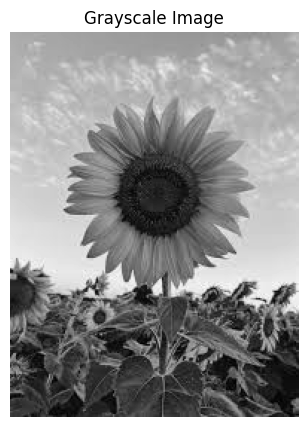

In [5]:
# 2. Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Grayscale Image", cmap_type="gray")


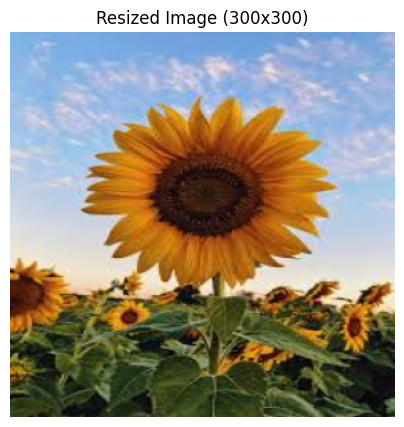

In [6]:
# 3. Resize Image (300x300)
resized_image = cv2.resize(image, (300, 300))
show_image(resized_image, "Resized Image (300x300)")


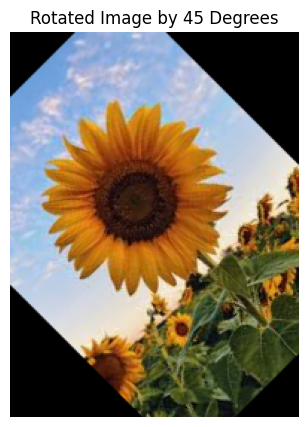

In [7]:
# 4. Rotate Image by 45 Degrees
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, M, (w, h))
show_image(rotated_image, "Rotated Image by 45 Degrees")


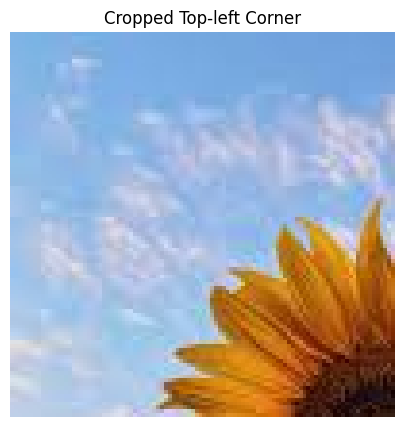

In [8]:
# 5. Crop Top-left Corner
corner = image[0:100, 0:100]
show_image(corner, "Cropped Top-left Corner")


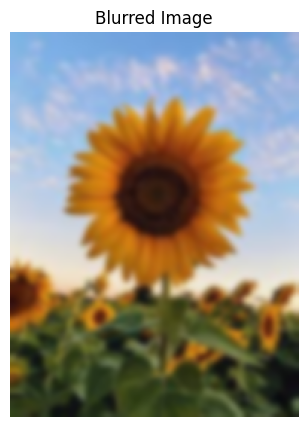

In [9]:
# 6. Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)
show_image(blurred_image, "Blurred Image")


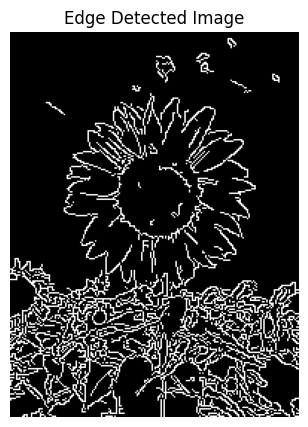

In [10]:
# 7. Edge Detection using Canny
edges = cv2.Canny(gray_image, 100, 200)
show_image(edges, "Edge Detected Image", cmap_type="gray")


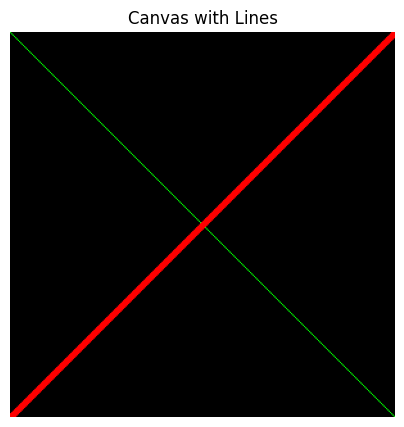

In [11]:
# 8. Create Canvas and Draw Lines
canvas = np.zeros((300, 300, 3), dtype="uint8")
green = (0, 255, 0)
red = (0, 0, 255)

cv2.line(canvas, (0, 0), (300, 300), green)
cv2.line(canvas, (300, 0), (0, 300), red, 3)

show_image(canvas, "Canvas with Lines")


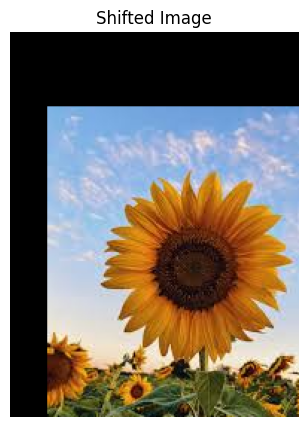

In [12]:
# 9. Shift the Image
M_shift = np.float32([[1, 0, 25], [0, 1, 50]])
shifted_image = cv2.warpAffine(image, M_shift, (image.shape[1], image.shape[0]))
show_image(shifted_image, "Shifted Image")


Resized Image (150px width) Shape: (200, 150, 3)


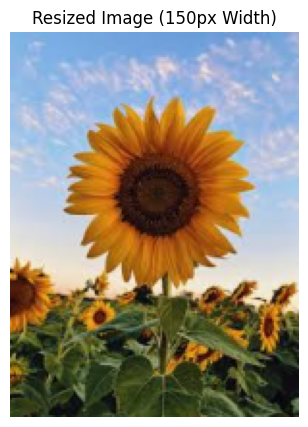

In [13]:
# 10. Resize (Width 150px keeping aspect ratio)
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
resized_aspect = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

print("Resized Image (150px width) Shape:", resized_aspect.shape)
show_image(resized_aspect, "Resized Image (150px Width)")


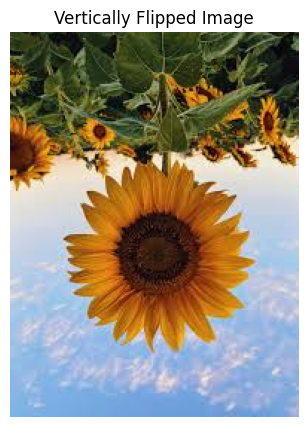

In [14]:
# 11. Flip Vertically
flipped_vertically = cv2.flip(image, 0)
show_image(flipped_vertically, "Vertically Flipped Image")


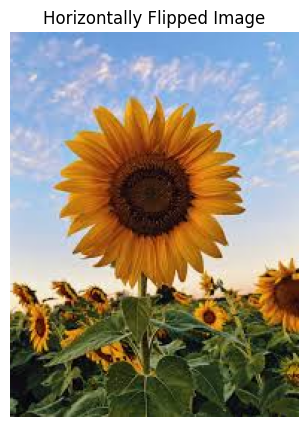

In [15]:
# 12. Flip Horizontally
flipped_horizontally = cv2.flip(image, 1)
show_image(flipped_horizontally, "Horizontally Flipped Image")


In [16]:
# 13. Save any Processed Image (optional)
cv2.imwrite("rotated_image.jpg", rotated_image)


True